# Investment Protfolio Analysis

### author: Toni Esteves
This Project is from the coursera course: Investment Strategies and Portfolio Analysis, from Rice University

## Week 1: Performance Measurement and Benchmarking of Portfolio Data

Compute the following return and risk measures for the DSFCX and DSFVX funds along with the S&P 500 index. Use S&P 500 index as the benchmark for all your analysis. (Hint: Note that you will not be computing excess return and risk measures for the S&P 500 index)

**Note**: Take the average returns for S&P to calculate the excess return for both the funds.



Here provides the performance data of three underlying assets:
- DFSCX	
- DFSVX 
- S&P 500

This project will compute the following indicators
1. Arithmetic average monthly return
2. Monthly standard deviation
3. Geometric average monthly return
4. Annualized arithmetic average return
5. Annualized volatility
6. Arithmetic mean excess monthly return
7. Annualized arithmetic mean excess return
8. Geometric mean excess monthly return
9. Annualized geometric mean excess return
10. Target semideviation
11. Tracking error


In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import math

df = pd.read_csv("../data/PortfolioData.csv")
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))


In [33]:
stats = df.describe()
stats

,Date,DFSCX,DFSVX,SP500,Risk-free
count,417,417.000000,282.000000,417.000000,417.000000
mean,1999-05-31 03:06:28.489208576,0.010978,0.010790,0.007859,0.003250
min,1982-01-29 00:00:00,-0.291931,-0.221374,-0.217630,-0.000037
25%,1990-09-28 00:00:00,-0.021368,-0.018471,-0.017004,0.000817
50%,1999-05-28 00:00:00,0.015924,0.013998,0.010491,0.003642
75%,2008-01-31 00:00:00,0.045010,0.045323,0.035224,0.004767
max,2016-09-30 00:00:00,0.235778,0.196560,0.131767,0.011290
std,NaN,0.056161,0.055083,0.043191,0.002513


### 1. Arithmetic average monthly return
$$r_a = \frac{1}{T}\sum^T_{t=1}r_t$$



In [38]:
stats.iloc[1,1:4]

DFSCX    0.010978
DFSVX     0.01079
SP500    0.007859
Name: mean, dtype: object

### 2. Monthly standard deviation

In [39]:
stats.iloc[7,1:4]

DFSCX    0.056161
DFSVX    0.055083
SP500    0.043191
Name: std, dtype: object

### 3. Geometric Average Monthly Return
$$r_g = \{\prod^T_{t=1}(1+r_t)\}^{{1}/{T}}-1$$

In [44]:
stats.iloc[0,1:4]

DFSCX    417.0
DFSVX    282.0
SP500    417.0
Name: count, dtype: object

In [41]:
print(f"DFSCX: {np.prod(df['DFSCX'].apply(lambda x : 1+x)) ** (1/417) - 1}")
print(f"DFSVX: {np.prod(df['DFSVX'].apply(lambda x : 1+x)) ** (1/282) - 1}")
print(f"SP500: {np.prod(df['SP500'].apply(lambda x : 1+x)) ** (1/417) - 1}")

DFSCX: 0.0093720408697191
DFSVX: 0.009251443277496385
SP500: 0.006913897965702409


### 4. Annualized Arithmetic Average return

In [42]:
stats.iloc[1,1:4] * 12

DFSCX    0.131731
DFSVX    0.129479
SP500    0.094308
Name: mean, dtype: object

### 5. Annualized volatility

In [43]:
sqrt_12 = math.sqrt(12)

stats.iloc[7,1:4] * sqrt_12

DFSCX    0.194547
DFSVX    0.190812
SP500    0.149616
Name: std, dtype: object

### 6. Arithmetic mean excess monthly return

In [45]:
rb = 0.007859 # take S&P 500 as benchmark

stats.iloc[1,1:4] - rb

DFSCX    0.003119
DFSVX    0.002931
SP500         0.0
Name: mean, dtype: object

### 7. Annualized arithmetic mean excess return

In [47]:
(stats.iloc[1,1:4] - rb) * 12

DFSCX    0.037423
DFSVX    0.035171
SP500         0.0
Name: mean, dtype: object

### 8. Geometric mean excess monthly return $r_{xg}$
$$r_{xg} = \frac{1+r_{pg}}{1+r_{bg}} - 1$$
where $r_{pg}$ is the geometric average of portfolio, $r_{bg}$ is the geometric average of benchmark.

along with

9. Annualized geometric mean excess return
$$r_{g,annual} = (1+r_{g,month})^{12} - 1$$

In [9]:
r_bg1 = np.prod(df['SP500'].apply(lambda x : 1+x)) ** (1/417) - 1

adjusted_sp500 = df['SP500'][df['DFSVX'].dropna().index]
r_bg2 = np.prod(adjusted_sp500.apply(lambda x : 1+x)) ** (1/282) - 1

r_pg1 = 0.0093720408697191
r_pg2 = 0.009251443277496385

r_xg1 = (1 + r_pg1) / (1 + r_bg1) - 1
r_xg2 = (1 + r_pg2) / (1 + r_bg2) - 1

print('DFSCX monthly: ',r_xg1)
print('DFSVX monthly: ',r_xg2)

print('DFSCX annualized: ', (1 + r_xg1) ** 12 - 1)
print('DFSVX annualized: ', (1 + r_xg2) ** 12 - 1)

DFSCX monthly:  0.002441264252070585
DFSVX monthly:  0.0036526687797715507
DFSCX annualized:  0.029691734434132755
DFSVX annualized:  0.04472340672773201


10. Target semideviation
- semideviation is computed by squaring only negative deviations from the mean
- the square root of semivariance is called semideviation
- suppose you have a return target, or a minumum acceptable return (MAR)
- target semivariance is the expected squared deviations below the target
- target semideviation is the square root of target semivariance, as a measure of downside risk, it is also a special case of lower partial moments(LPM) methodology for dealing with downside variation
- formula for a lower partial moment of degree p
$$LPM_{p} = \sum^N_{i=1}w_i d(i)(R_i-\tau)^p$$
where $d(i)$ is the indicator, equal to 1 if $R_i <\tau$, and 0 otherwise; $w_i = 1/N$ is the weight, Note that $N$ is the number of $d_i=1$
- downside semivariance is a special case of the LPM methodology with power p = 2 and target equal to the mean, which is useful when comparing distributions that are not normal and have different means
- upside semideviation is the converse of downside semivariance

In [10]:
df['di_DFSCX'] = df['DFSCX'].apply(lambda x: 1 if x < df['DFSCX'].mean() else 0)
df['di_DFSVX'] = df['DFSVX'].apply(lambda x: 1 if x < df['DFSVX'].mean() else 0)
df['di_SP500'] = df['SP500'].apply(lambda x: 1 if x < df['SP500'].mean() else 0)

In [11]:
N1 = len(df[df['di_DFSCX'] == 1])
N2 = len(df[df['di_DFSVX'] == 1])
N3 = len(df[df['di_SP500'] == 1])

print(N1, N2, N3)

190 130 191


In [12]:
df

,Date,DFSCX,DFSVX,SP500,Risk-free,di_DFSCX,di_DFSVX,di_SP500
0,1982-01-29,-0.019600,NaN,-0.017544,0.007306,1,0,1
1,1982-02-26,-0.029575,NaN,-0.060548,0.009176,1,0,1
2,1982-03-31,-0.008601,NaN,-0.010167,0.011077,1,0,1
3,1982-04-30,0.038346,NaN,0.040014,0.011290,0,0,0
4,1982-05-28,-0.024758,NaN,-0.039162,0.009592,1,0,1
...,...,...,...,...,...,...,...,...
412,2016-05-31,0.010662,0.004742,0.015329,0.000115,1,1,0
413,2016-06-30,-0.001737,-0.011581,0.000906,0.000188,1,1,1
414,2016-07-29,0.050167,0.048516,0.035610,0.000171,0,0,0
415,2016-08-31,0.015924,0.017352,-0.001219,0.000165,0,0,1


In [13]:
df['indicator_squared_deviation_DFSCX'] = df['di_DFSCX'] * ((df['DFSCX'] - df['DFSCX'].mean())**2)
df['indicator_squared_deviation_DFSVX'] = df['di_DFSVX'] * ((df['DFSVX'] - df['DFSVX'].mean())**2)
df['indicator_squared_deviation_SP500'] = df['di_SP500'] * ((df['SP500'] - df['SP500'].mean())**2)

In [14]:
df

,Date,DFSCX,DFSVX,SP500,Risk-free,di_DFSCX,di_DFSVX,di_SP500,indicator_squared_deviation_DFSCX,indicator_squared_deviation_DFSVX,indicator_squared_deviation_SP500
0,1982-01-29,-0.019600,NaN,-0.017544,0.007306,1,0,1,9.349893e-04,NaN,0.000645
1,1982-02-26,-0.029575,NaN,-0.060548,0.009176,1,0,1,1.644513e-03,NaN,0.004680
2,1982-03-31,-0.008601,NaN,-0.010167,0.011077,1,0,1,3.833214e-04,NaN,0.000325
3,1982-04-30,0.038346,NaN,0.040014,0.011290,0,0,0,0.000000e+00,NaN,0.000000
4,1982-05-28,-0.024758,NaN,-0.039162,0.009592,1,0,1,1.277033e-03,NaN,0.002211
...,...,...,...,...,...,...,...,...,...,...,...
412,2016-05-31,0.010662,0.004742,0.015329,0.000115,1,1,0,9.960003e-08,0.000037,0.000000
413,2016-06-30,-0.001737,-0.011581,0.000906,0.000188,1,1,1,1.616609e-04,0.000500,0.000048
414,2016-07-29,0.050167,0.048516,0.035610,0.000171,0,0,0,0.000000e+00,0.000000,0.000000
415,2016-08-31,0.015924,0.017352,-0.001219,0.000165,0,0,1,0.000000e+00,0.000000,0.000082


In [15]:
l1 = np.sum(df['indicator_squared_deviation_DFSCX']) / N1
l2 = np.sum(df['indicator_squared_deviation_DFSVX']) / N2
l3 = np.sum(df['indicator_squared_deviation_SP500']) / N3
print(math.sqrt(l1), math.sqrt(l2), math.sqrt(l3))

0.06239275103636807 0.06126255735445461 0.047954847104903775


11. Tracking error
tracking error is the standard deviation of the arithmetic excess return, denoted by $\sigma(\bar{r}_p - \bar{r}_b)$

In [16]:
df['excess-DFSCX'] = df['DFSCX'] - df['SP500']
df['excess-DFSVX'] = df['DFSVX'] - df['SP500']


In [17]:
df.describe()

,Date,DFSCX,DFSVX,SP500,Risk-free,di_DFSCX,di_DFSVX,di_SP500,indicator_squared_deviation_DFSCX,indicator_squared_deviation_DFSVX,indicator_squared_deviation_SP500,excess-DFSCX,excess-DFSVX
count,417,417.000000,282.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,282.000000,417.000000,417.000000,282.000000
mean,1999-05-31 03:06:28.489208576,0.010978,0.010790,0.007859,0.003250,0.455635,0.311751,0.458034,0.001774,0.001730,0.001053,0.003119,0.004319
min,1982-01-29 00:00:00,-0.291931,-0.221374,-0.217630,-0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.171826,-0.096768
25%,1990-09-28 00:00:00,-0.021368,-0.018471,-0.017004,0.000817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018266,-0.016336
50%,1999-05-28 00:00:00,0.015924,0.013998,0.010491,0.003642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001124,0.003993
75%,2008-01-31 00:00:00,0.045010,0.045323,0.035224,0.004767,1.000000,1.000000,1.000000,0.001046,0.000856,0.000618,0.022944,0.025022
max,2016-09-30 00:00:00,0.235778,0.196560,0.131767,0.011290,1.000000,1.000000,1.000000,0.091754,0.053900,0.050845,0.255886,0.112892
std,NaN,0.056161,0.055083,0.043191,0.002513,0.498626,0.463765,0.498834,0.006311,0.005394,0.003658,0.036173,0.033549


as summarized, tracking error = 0.036173, 0.033549

## Display the Answers 

note that we have a difference with the sample answer from coursera. 

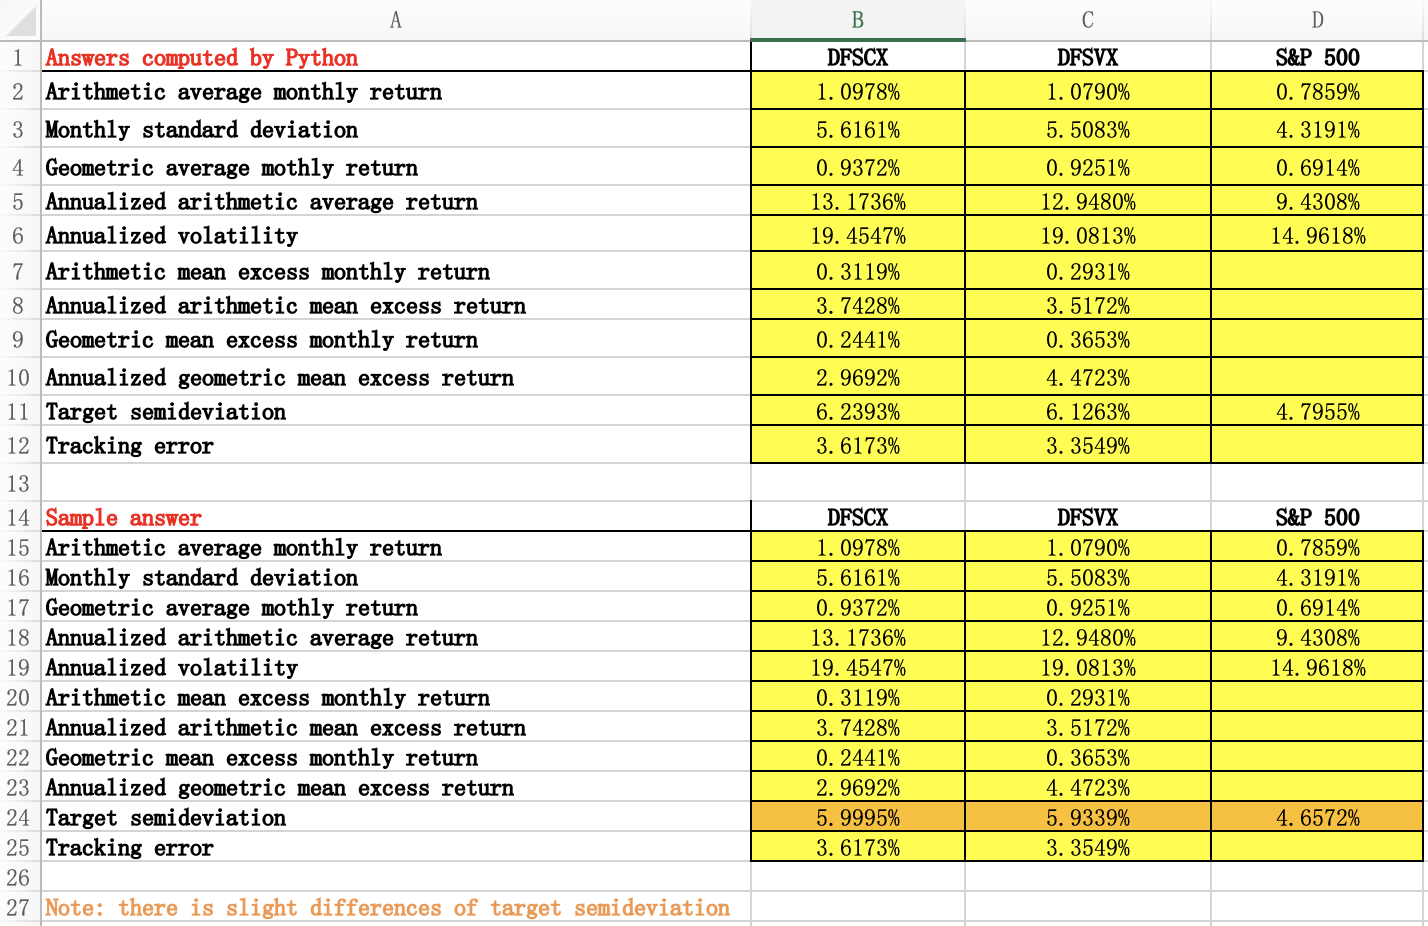

In [19]:
from IPython.display import Image
Image("./answers.png")

## Week 2: Quantitative Risk Assessment

In this module, we focus on constructing return-to-risk measures in order to compare investments in terms of their desirability. You are going to learn several different ways to calculate Risk-Adjusted Return Measures for an actively managed fund and understand how these measures differ from each other.

### Lecture Notes

#### General Notation
$$r_i-r_f = \alpha_i + \beta_i (r_b - r_f) + \epsilon_i$$
- $r_i$: return on asset i
- $r_f$: risk-free rate
- $r_b$: return on benchmark portfolio (in CAPM = market portfolio)
- $\alpha_i,\beta_i$: wrt the benchmark portfolio
- $\epsilon_i$: residual return on asset i
- $\sigma_i = \sigma(r_i-r_f)$
- $\sigma_b = \sigma(r_b-r_f)$
- $\sigma_\epsilon = \sigma(\epsilon_i)$

#### 1. Sharp Ratio 
$$SR = {\sf sharp\ ratio} = \frac{{\sf risk\ premium}}{\sigma_p} = \frac{E(r_p-r_f)}{\sigma_p} = \frac{\bar{r_p}-\bar{r_f}}{\sigma_p}$$
- In the hypothetical world of CAPM, the maximum Sharpe ratio is that of the market portfolio. 
- In the real world, Sharpe ratio provides a basis to rank portfolios.
- Sharpe ratio is generally not used to evaluate the performance individual securities because it does not account for correlation between securities.
- Sharpe ratio is a measure of reward to variability. 
- $SR_{annual} = SR_{month} * \sqrt{12}$

#### 2. Sortino Ratio
$$SR_{down} = {\sf sortino\ ratio} = \frac{E(r_p-\tau)}{\sigma_{down}}$$
- Sortino ratio is an extension of the Sharpe ratio that focuses on the downside risk.

#### 3. Treynor’s Measure
$$TR_{p} = {\sf treynor\ ratio} = \frac{E(r_p-r_f)}{\beta_p}$$
- Like the Sharpe ratio, Treynor’s measure gives the excess return per unit of risk, but it uses systematic risk instead of total risk.
- Not clear how to apply if there are multiple risk factors.
- Treynor measure is a better measure for comparing assets that may be combined into portfolios.

#### 4. Jensen’s alpha
- Alpha is a measure of the risk-adjusted excess return: Benchmark alpha, CAPM alpha, Multi-factor alpha
 
- Jensen’s alpha is the maximum you should be willing to compensate a portfolio manager. For example, if a fund has a pre-expense alpha of 0.0015 (monthly), this means we should be willing to pay up to 0.15% per month, or 1.8% per year. Alternatively, were you to compensate the manager this much, your after-expense alpha would be zero.
 
- Jensen’s alpha is the excess return not explained by the CAPM (or your favorite risk-based model). To generate outperformance, we must have positive alpha’s.

#### 5. Appraisal Ratio
$$AR = {\sf appraisal\ ratio} = \frac{\alpha_p}{\sigma_{p,\epsilon}}$$
- $\alpha_p$: Jensen’s alpha; $\sigma_{p,\epsilon}$ = residual risk = idiosyncratic risk of the portfolio
- Jensen’s alpha does not adjust for the amount of idiosnycratic risk in the portfolio.
- Appraisal ratio represents the expected abnormal return per unit of systematic risk taken.

#### 6. Information Ratio
$$IR = {\sf information\ ratio} = \frac{E(\bar{r}_p-\bar{r}_b)}{\sigma(\bar{r}_p-\bar{r}_b)} $$
- $\bar{r}_p$: average return on the portfolio
- $\bar{r}_b$: average return on the benchmark
- $\sigma(\bar{r}_p-\bar{r}_b)$ = volatility of the difference = Tracking Error
- The appraisal ratio and information ratio are both measures of benefit and cost – how much abnormal return for how much residual risk, where residual risk is $\sigma(\epsilon_i)$

#### 7. When are these measures appropriate to use?
- Sharpe Ratio is more appropriate for evaluating entire portfolios, rather than sub-portfolios or individual stocks. Suppose the investor can choose only one fund and choosing among different funds, then choose the one with the highest Sharpe ratio.
 
- The appraisal ratio and the information ratio are informative if the focus is on active management relative to a benchmark – effectively they are measures of active reward to active risk. The basis for the risk adjustment is residual risk or tracking error.
 
- Jensen’s alpha and Treynor measure are better suited for evaluating individual stocks or sub-portfolios. They use systematic risk as the basis for adjusting returns.

- If the underlying return distribution is asymmetric or skewed, or if the investor has a particular return target that defines downside risk, then Sortino ratio is a good alternative to Sharpe ratio.

#### 8. Important Caveat and Summary
- Beware of estimation error!
- Averages, standard deviations, and regressions are notoriously susceptible to outliers.
- Distribution of future returns might not be the same as past returns.
- It is advisable that you use more than one single measure.
- The objective is to separate excess returns due to stock selection/asset allocation skill from higher returns due to compensation for risk.

In [21]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

df = pd.read_csv("../data/quiz_data.csv")

In [22]:
# A: Returns on Portfolio A
# B: Returns on Portfolio B
# M: Market Returns
df

,Month,A,B,M
0,1,0.67,3.72,-1.56
1,2,1.69,3.31,-2.08
2,3,12.37,7.26,3.67
3,4,0.32,0.15,-6.14
4,5,3.65,4.17,-0.91
5,6,-14.55,-0.98,-7.25
6,7,-2.71,-0.61,-7.90
7,8,2.28,4.39,0.49
8,9,-13.53,-3.52,-11.00
9,10,16.91,10.46,8.64


In [23]:
# Excess Returns over the risk free rate!
df.describe()

,Month,A,B,M
count,36.000000,36.000000,36.000000,36.000000
mean,18.500000,1.561667,4.660000,0.243333
std,10.535654,6.563269,3.021299,4.339112
min,1.000000,-14.550000,-3.520000,-11.000000
25%,9.750000,-1.337500,3.287500,-1.685000
50%,18.500000,1.615000,4.870000,0.890000
75%,27.250000,4.547500,6.297500,2.162500
max,36.000000,16.910000,10.460000,8.640000


In [24]:
def risk_assessment(x, y):
    ''' 
    x is market return, 
    y is portfolio return
    '''
    sharp_ratio = y.mean() / y.std()
    corr = np.corrcoef(x, y)[0][1]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

    alpha = intercept
    beta = slope
    r2 = r_value**2
    treynor_measure = y.mean() / beta

    epsilon = y - (beta*x + alpha)
    residual_risk = epsilon.std()
    appraisal_ratio = alpha / residual_risk

    excess_return_over_market = y - x
    tracking_error = excess_return_over_market.std()
    information_ratio = excess_return_over_market.mean() / tracking_error
    
    print("average return: ", y.mean())
    print("return volatility: ", y.std())
    print("sharp ratio: ", sharp_ratio)
    print("CAPM alpha: ", alpha)
    print("CAPM beta: ", beta)
    print("corr: ", corr)
    print("r2: ", r2)
    print("treynor's measure: ", treynor_measure)
    print("residual risk (measure idiosyncratic risk): ", residual_risk)
    print("appraisal ratio: ", appraisal_ratio)
    print("information ratio: ", information_ratio)

    _ = plt.plot(x, y, 'o', label='Original data', markersize=10)
    _ = plt.plot(x, beta*x + alpha, 'r', label='Fitted line')
    _ = plt.legend()
    plt.show()

## alternative methods
# A = np.vstack([x, np.ones(len(x))]).T
# beta, alpha = np.linalg.lstsq(A, y, rcond=None)[0]
#
# corr = np.corrcoef(x, y)[0][1]
# std_a = y.std()
# std_m = x.std()
# beta = corr * std_a / std_m
# treynor_measure = y.mean() / beta

average return:  1.5616666666666665
return volatility:  6.563269437885794
sharp ratio:  0.237940356014048
CAPM alpha:  1.2466655922731071
CAPM beta:  1.294524963261203
corr:  0.8558370917434953
r2:  0.7324571276039639
treynor's measure:  1.2063627284038407
residual risk (measure idiosyncratic risk):  3.3948213607764792
appraisal ratio:  0.3672256828229583
information ratio:  0.3634374520529549


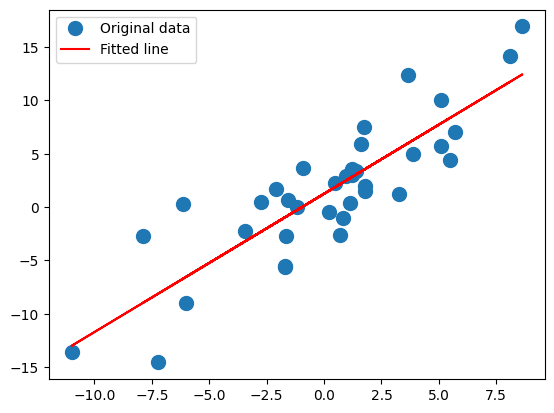

In [25]:
risk_assessment(df['M'], df['A'])

average return:  4.659999999999999
return volatility:  3.0212986800853887
sharp ratio:  1.5423830919849
CAPM alpha:  4.491198606404316
CAPM beta:  0.6937043572425357
corr:  0.9962805915487277
r2:  0.9925750170966828
treynor's measure:  6.717559074478686
residual risk (measure idiosyncratic risk):  0.26034029339665443
appraisal ratio:  17.2512619841045
information ratio:  3.261194423949418


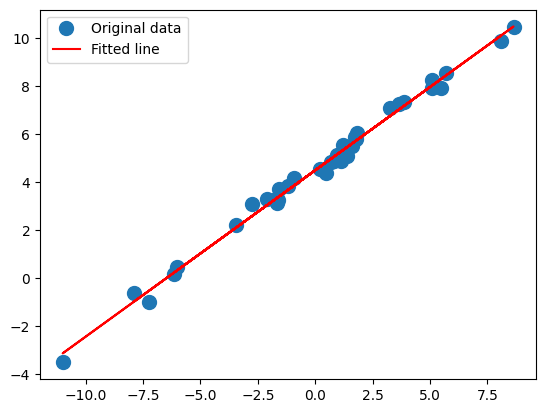

In [26]:
risk_assessment(df['M'], df['B'])

### Conclusion
- Which portfolio is considered more aggressive? ans: A
- Which portfolio is more diversified? In other words, which portfolio has less idiosyncratic risk? ans: B
- If you were to choose one single portfolio to invest all of your wealth in, which one would you choose? ans: B
- Suppose you are already holding a passive index fund, and you are choosing between A and B to add to your portfolio. Which portfolio is more attractive? ans: B

## Week 3: Style Analysis and Performance Arrtibution

In this module, you are going to learn to use two analytical tools that are widely used in practice to evaluate what the portfolio performance can be attributed to. You will first learn about style analysis. Then, you will learn about attribution analysis, which has become a crucial component in internal evaluation system of investment managers and institutional clients in the industry. Focus will be placed on the practical applications. Learning objectives as listed below.

- Explain investment styles and benchmarks
- Conduct a style analysis for a portfolio
- Explain and breakdown a portfolio's return to style and selection
- Conduct an attribution analysis for a portfolio
- Compare and interpret the asset allocation vs. security selection contributions to a portfolio’s return

### Lecture Notes

#### 1. Style Analysis
- Style analysis is a statistical method of decomposing the portfolio’s return into a set of style-specific benchmarks. Decompose portfolio return to ‘return due to style’ and ‘return due to selection’
- ‘return due to selection’ = difference between fund return and that of a passive mix of similar styles.
- Style analysis is a powerful and sophisticated technique used to measure the performance of a portfolio manager. Describe performance by analyzing how the portfolio return act – rather than what the portfolio includes.
- Equity investment styles, combination of: large/midium/smail cap; value/market oriented/growth.
- Usage 1 To determine whether a fund’s strategy has deviated from its stated objective.
- Usage 2: To measure performance versus the ‘true’ benchmark rather than an arbitrary benchmark such as the S&P 500.
- Usage 3: Understand the true exposures of a portfolio and how it will best fit with an investor’s overall portfolio allocation.

##### Typical benchmarks
Depending on the fund’s mandate, may also include: Strategies taking advantage of “anomalies” and Dynamic strategies with option-like payoffs
- Treasury bill index
- Government bond index
- Corporate bond index
- Foreign bond index
- Large-cap value index
- Large-cap growth index
- Small-cap value index
- Small-cap growth index
- Foreign equity index


#####  Style Analysis Procedures

$$r_{pt} = a + w_{1p}I_{1t} + w_{2p}I_{2t} + w_{3p}I_{3t} + ... + w_{kp}I_{kt} + \epsilon_t$$
- $I_j$: asset class index fund (style benchmark)
- $w_j$: weight on that style j
- $w_1 + w_2 + ... + w_k = 1$
- Selection: $\epsilon_t$ = error term; $a$ = abnormal performance
- Style: $w_{1p}I_{1t} + w_{2p}I_{2t} + w_{3p}I_{3t} + ... + w_{kp}I_{kt}$

Solve a quadratic optimization problem using the past returns on the portfolio and the relevant indices to find the ‘style’ of the portfolio

- Goal: tune $\{w_j\}$ to minimize $Var(r_t - a -  w_{1p}I_{1t} - w_{2p}I_{2t} - ... - w_{kp}I_{kt})$

1. Start with arbitrary coefficients and intercept
2. Compute residuals
3. Compute squared residuals and sum them
4. Minimize sum of squared residuals by changing intercept and coefficients using Solver with constraints that coefficients are greater than or equal to zero and sum to 1.
5. Calculate $R^2 = \frac{Var(\epsilon_i)} { Var(r_p)}$, Var is variance.

#### 2. Performance Arribution
$$r_p - r_B = \sum^N_{i=1}w_{pi}r_{pi} - \sum^N_{i=1}w_{Bi}r_{Bi} = \sum^N_{i=1}(w_{pi}r_{pi} - w_{Bi}r_{Bi})= \sum^N_{i=1}[(w_{pi}-w_{Bi})r_{Bi} + w_{pi}(r_{pi}-r_{Bi})]$$
- contribution from asset allocation: $w_{pi}-w_{Bi})r_{Bi}$
- contribution from security selection: $w_{pi}(r_{pi}-r_{Bi}$

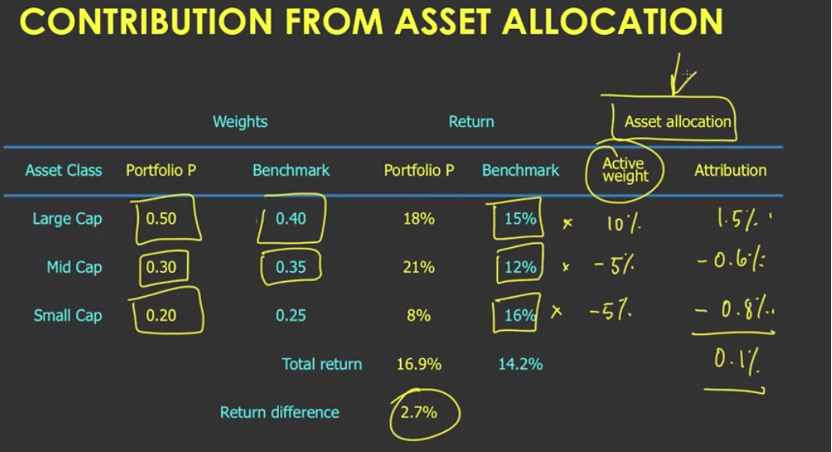

In [27]:
Image("./fig1.png")

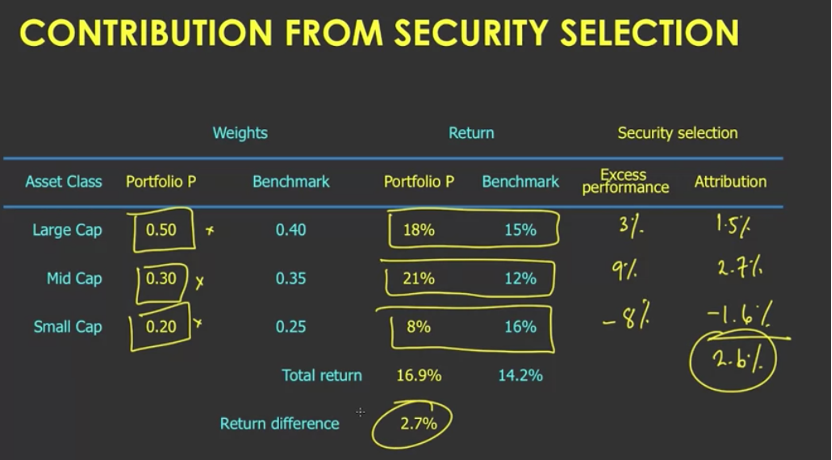

In [28]:
Image("./fig2.png")

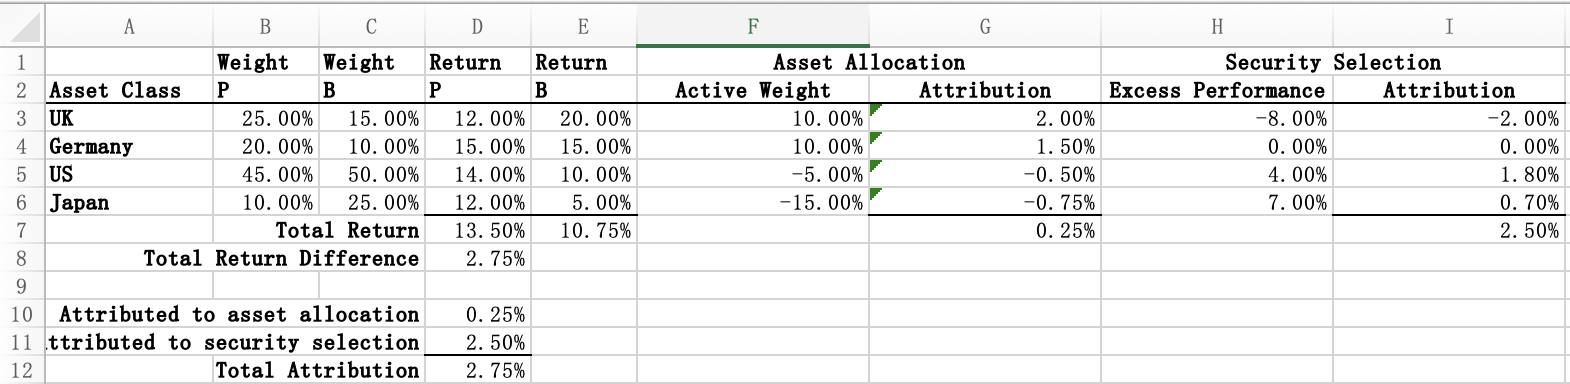

In [29]:
Image("./fig3.png")

Performance attribution dissects a portfolio’s return into its components to determine the exact sources of gains and the effectiveness of the stock selection process. Performance (or return) attribution breaks down returns into the component due to: 
- The performance of the asset class according to the benchmark. 
- The active weighting decision made by the manager to that benchmark. 
- The manager’s security selection